# Big Data Analysis 2
### Exercise: Data Clustering with K-means 2

In previous notebook we learned how to use k-means clustering. But how to choose optimal cluster count? It is always best, if you have prior information about the data. But if you don't have any prior information, you can try either elbow method or silhouette method. Let's try both!  

***Hint.*** Check these first:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html


#### Step 1: Preprosess the data and read it to Pandas dataframe 
**Task 1.** Copy `/bda1/data/google_ping.txt` to your working file

**Task 2.** Remove duplicate lines (indicated with DUP)

**Task 3.** Replace timeout lines with NaN (`Request timeout for icmp_seq xxx`)

**Task 4.** Remove first header line (`PING google.com (74.125.205.138): 56 data bytes`)

**Task 5.** Remove PING statistics from the end 
```
--- google.com ping statistics ---
94 packets transmitted, 94 packets received, 0.0% packet loss
round-trip min/avg/max/stddev = 21.390/44.664/153.979/40.020 ms
````
**Task 6.** Remove all other characters except ping times from ping rows

----------
**Task 7.** Import pandas as pd, numpy as np, matplotlib.pyplot as plt, from sklearn.cluster import KMeans, from sklearn.metrics import silhouette_samples, silhouette_score and inline %matplotlib.

------

**Task 8.** Read ping times and NaNs to pandas dataframe `google` with column label `ping`.

**Task 9.** Use `plot()` and `hist(bins=50)` to visualize `google` data.

**Task 10.** Print dataframe length.

**Task 11.** Print dataframe statistics with `describe()`. 


In [1]:
## Task 1-6
## Your code here

!cp ../data/google_ping.txt google_ping.txt

dup = 'DUP'

a_file = open("google_ping.txt", "r")
lines = a_file.readlines()
a_file.close()

new_file = open("google_ping2.txt", "w")
for line in lines:
    if not(dup in line):
        new_file.write(line)
new_file.close()

!sed -i -e 's/Request timeout for icmp_seq.*/NaN/g' google_ping2.txt
!sed -i '1d' google_ping2.txt
!sed -i "$(( $(wc -l < google_ping2.txt)-3 )),$ d" google_ping2.txt
!sed -i 's/.*time=\(.*\) ms/\1/g' google_ping2.txt
#!sed -i -e 's/NaN//g' google_ping2.txt
#!sed -i '/^$/d' google_ping2.txt

In [2]:
## Task 7
## Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

95


,ping
0,22.476
1,24.295
2,89.301
3,NaN
4,149.829
...,...
90,24.603
91,24.815
92,25.114
93,24.758


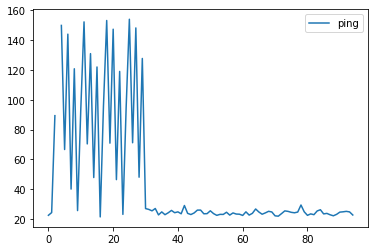

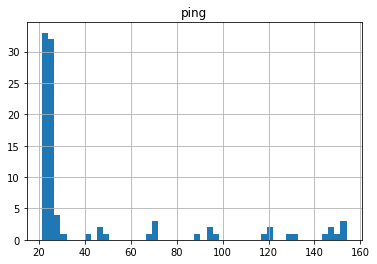

In [3]:
## Task 8-11
## Your code here

ping_data = !cat google_ping2.txt
ping_list = list(np.float_(ping_data))
google = pd.DataFrame(ping_list, columns=['ping'])

google.plot() 
google.hist(bins=50)

print(len(google))
google.describe()
google

### Step 2: Add index values

**Task 12.** Add new column `i` to google dataframe and fill it with indexes 0...94


In [83]:
## Task 12
## Your code here

google['i'] = np.arange(0,95)
google = google[['i', 'ping']]
google.dropna(inplace=True)
google.head(10)

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,i,ping
0,0,22.476
1,1,24.295
2,2,89.301
4,4,149.829
5,5,66.600
6,6,143.979
7,7,40.057
8,8,120.769
9,9,25.637
10,10,93.705


,i,ping
0,0,22.476
1,1,24.295
2,2,89.301
4,4,149.829
5,5,66.600
6,6,143.979
7,7,40.057
8,8,120.769
9,9,25.637
10,10,93.705


### Step 3: Elbow method

Let's try elbow method with cluster values 1...10. In elbow method we try to find point, were sum of squared distances of samples reach near floor level.   

***Hint.*** *Check what `kmeans.inertia_` means. :)*

**Task 13.** Make a for loop to test K-means inertia value with different cluster counts.

**Task 14.** Plot picture "inertia vs. K-value" i.e. elbow -picture. 

**Task 15.** Print and save inertia values to vector `Sum_of_squared_distances`.


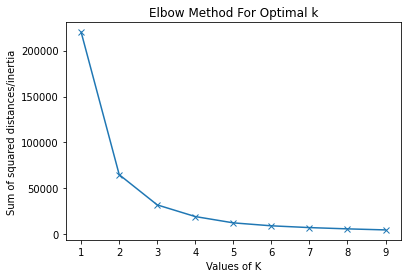

[220032.33154167017, 64858.551903624306, 31902.62894239839, 19204.65813072136, 12343.195179785418, 9132.856478083693, 7193.757671188455, 5806.878990085281, 4661.4495708096765]


In [38]:
## Task 13-14
## Your code here

Sum_of_squared_distances = [] 
for cluster in range(1, 10): 
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++')
    kmeans.fit(google) 
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(range(1, 10), Sum_of_squared_distances, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

print(Sum_of_squared_distances)

You should get something like this:

<img src="./bda2_kmeans_answers/elbow.png" width=300px/>

### Step 4. Silhouette method

And now silhouette method. Let's calculate silhouette score with clusters 2...10 (1 is not allowed value). In silhouette method we try to find point, were we get maximum score value. 

***Hint.*** *Check `silhouette_score()`*

**Task 16.** Make a for loop to test silhouette score value with different cluster counts.

**Task 17.** Plot picture "silhouette score vs. K-value". 

**Task 18.** Print and save silhouette score values to vector `silhouette_avg`.


For n_clusters = 2, silhouette score is 0.6829775884176349)
For n_clusters = 3, silhouette score is 0.5480086349308476)
For n_clusters = 4, silhouette score is 0.5548816713657364)
For n_clusters = 5, silhouette score is 0.5575005269484032)
For n_clusters = 6, silhouette score is 0.5335657125059202)
For n_clusters = 7, silhouette score is 0.5145240620601629)
For n_clusters = 8, silhouette score is 0.5197855745531653)
For n_clusters = 9, silhouette score is 0.5004659701636711)


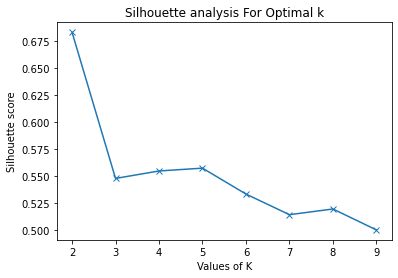

[0.6829775884176349, 0.5480086349308476, 0.5548816713657364, 0.5575005269484032, 0.5335657125059202, 0.5145240620601629, 0.5197855745531653, 0.5004659701636711]


In [90]:
## Task 16-18
## Your code here

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouettes = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(google)
    #centers = clusterer.cluster_centers_

    score = silhouette_score(google, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    silhouettes.append(score)

plt.plot(range(2, 10), silhouettes, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()
    
#silhouette_avg = sum(silhouettes) / len(silhouettes)
silhouette_avg = silhouettes
print(silhouette_avg)

You should get something like this:

<img src="./bda2_kmeans_answers/silhouette.png" width=300px/>

### Step 5. Automatic cluster count selection

Because it's easy to find maximum silhouette score with argmax() function, let's try if we get same result as in previous notebook.   

**Task 19.** Find index of maximum silhouette score and use it as a cluster count. 

**Task 20.** Fit Kmeans 

**Task 21.** Plot data clusters as a scatter plot and include cluster_cernter lines.

**Task 22.** Print and save Kmeans cluster_centers to variable `centroids`.

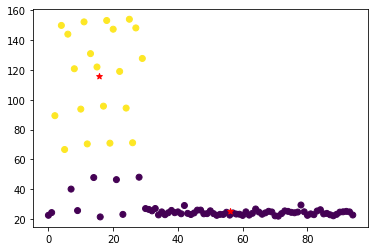

[[ 56.06756757  25.37106757]
 [ 15.65       116.0466    ]]


In [87]:
## Task 19-22
## Your code here
import numpy as np

max_sil = silhouettes[np.argmax(silhouettes)]
max_sil

kmeans = KMeans(n_clusters=2)
kmeans.fit(google)

plt.scatter(google['i'], google['ping'], c=kmeans.labels_)
centroids = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker=('*'))

plt.show()
print(centroids) 

You should get same picture as in previous notebook. :)

<img src="./bda2_kmeans_answers/kmeans2.png" width=300px/>

### Reflection
Answer following questions:
1. Why we need methods like elbow or silhouette score?
2. Which one is better? Why?


*Your answers here...*

1. Elbow ja silhouette score metodien avulla löydetään optimaalisin klusterin arvo tarkan metodin avulla 
arvuuttelun sijaan.

2. Silhouette on parempi, koska sillä löydetään optimaalisin arvo tarkasti ja helposti. Elbow-kuvaajasta 
optimaalisimman arvon löytäminen on epämääräisempää. Itse ainakin tämän tehtävän kuvaajasta olisin valinnut arvot 3
tai 4.

### Check your answers by running following cell:

In [91]:
# Do not change this code!

import importlib
import bda2_kmeans2_check
importlib.reload(bda2_kmeans2_check)

print("Results:")
correct = bda2_kmeans2_check.check_kmeans2(Sum_of_squared_distances, silhouette_avg, centroids)
print("Correct answers", correct, "/ 3.")

Results:
	 'centroids' is not correct. Please check your answer.
centroids
 [[ 56.06756757  25.37106757]
 [ 15.65       116.0466    ]]
ref
 [[ 56.06756757  25.37106757]
 [ 15.65       116.0466    ]]
Correct answers 2 / 3.


### Nice work! 

In [ ]:
TÄSSÄKIN TAAS SAMA VIKA NOIDEN CENTROIDI-LUKUJEN TARKISTUKSEN KANSSA.